# Feature Engineering Classification

## Import libraries

In [13]:
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt
import numpy as np

## Load preprocessed data

In [2]:
with open('preprocessed_data.pkl', 'rb') as f:
    preprocessed_data = pickle.load(f)

X_scaled = preprocessed_data['X_scaled']
y = preprocessed_data['y']
class_labels = preprocessed_data['label_names']

## Apply PCA

In [3]:
# User change to preferred number of components
n_components = 3

pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X_scaled)

In [4]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Principal Components:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.2%}")

Explained Variance by Principal Components:
PC1: 72.96%
PC2: 22.85%
PC3: 3.67%


## Save PCA-transformed data

In [5]:
pca_data = {
    "X_pca": X_pca,        # PCA-transformed data
    "X_raw": preprocessed_data["X_raw"],  # Raw data for CV
    "y": preprocessed_data["y"]
}

with open('pca_data.pkl', 'wb') as f:
    pickle.dump(pca_data, f)

## Plot first two principal components

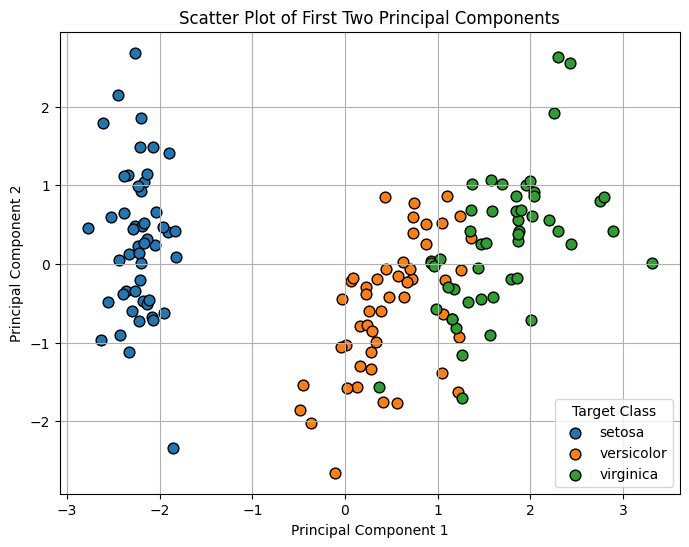

In [14]:
plt.figure(figsize=(8, 6))

# Plot each class separately to ensure proper legend handling
unique_classes = np.unique(y)
colors = plt.cm.tab10(range(len(unique_classes)))

for i, class_label in enumerate(unique_classes):
    plt.scatter(
        X_pca[y == class_label, 0],
        X_pca[y == class_label, 1],
        label=class_labels[i], 
        color=colors[i], 
        edgecolor='k',
        s=60,
    )

plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Target Class", loc='best') 
plt.grid(True)
plt.show()